In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from stock_info.pull_stock_info import get_stock_info
from graphing.graph_stock_info import make_color_plot


We got all the reddit posts with stock tickers from 2018 using code in pmaw.api
Don't call in essay b/c data doesn't change and it takes a long time to run

In [3]:

# Get stock data from alpaca.markets API

get_stock_info('TSLA', "2018-09-27", 365)

get_stock_info('AMZN', "2018-07-23", 365)

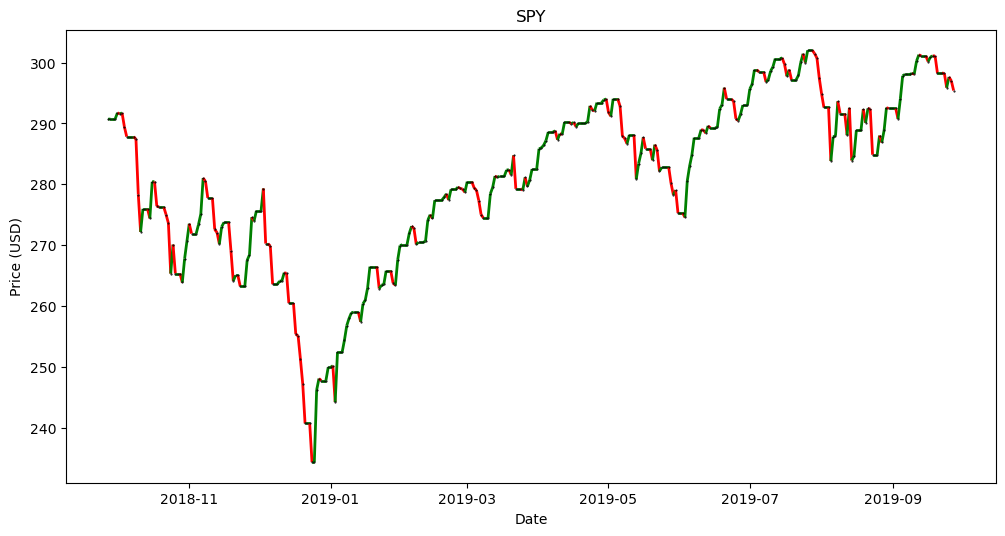

In [13]:
# Get stock data from alpaca.markets API
# Start date is from reddit post
get_stock_info('SPY', "2018-09-27", 365)

# Graph stock data
make_color_plot("stock_info/data/SPYdata.csv", "SPY")

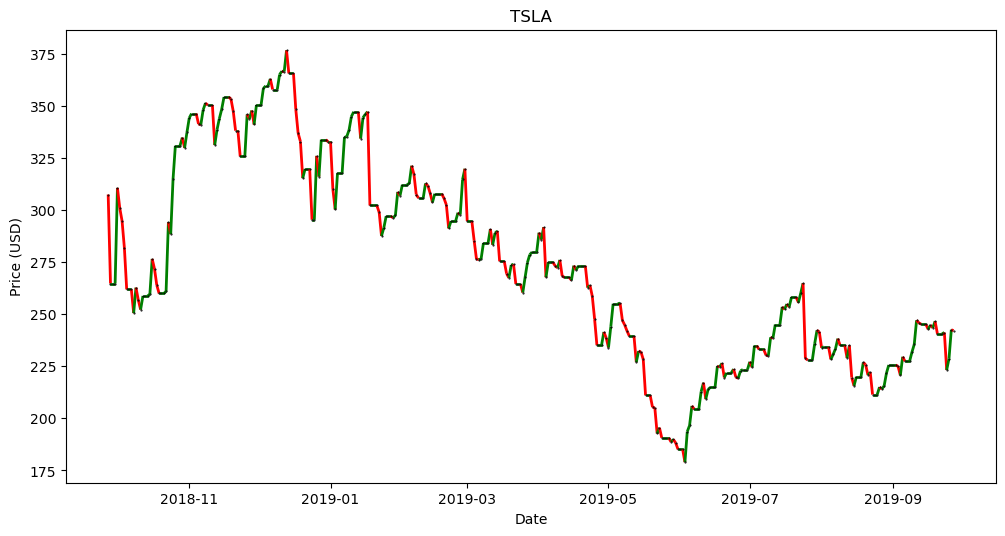

In [9]:
make_color_plot("stock_info/data/TSLAdata.csv", "TSLA")

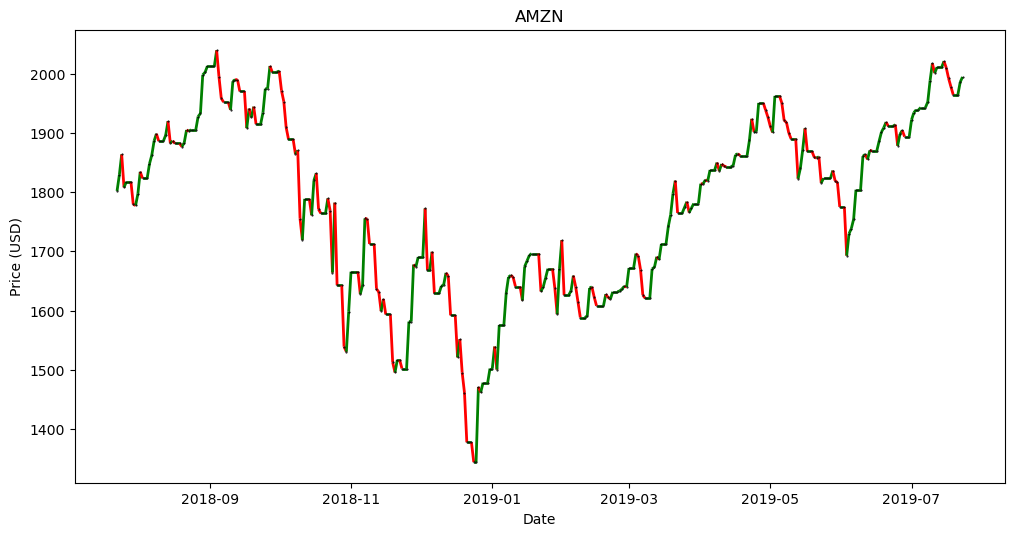

In [11]:
make_color_plot("stock_info/data/AMZNdata.csv", "AMZN")